# Regresión Logística

## Recursos:

- [Tutorial de Regresión Logística para Aprendizaje Automático](#)
- [Regresión Logística para Aprendizaje Automático](#)
- [Cómo Implementar Regresión Logística con Descenso de Gradiente Estocástico Desde Cero con Python](#)

La regresión logística es el algoritmo de clasificación lineal más utilizado para problemas de dos clases. Es fácil de implementar, fácil de entender y obtiene excelentes resultados en una gran variedad de problemas, incluso cuando se violan las expectativas que el método tiene sobre tus datos.

## Descripción

### Regresión Logística

La regresión logística recibe su nombre por la función utilizada en el núcleo del método, la [función logística](#).

La función logística, también llamada **función Sigmoide**, fue desarrollada por estadísticos para describir las propiedades del crecimiento poblacional en ecología, aumentando rápidamente y alcanzando un máximo en la capacidad de carga del entorno. Es una curva en forma de "S" que puede tomar cualquier número real y mapearlo a un valor entre 0 y 1, pero nunca exactamente en esos límites.

$$
\frac{1}{1 + e^{-x}}
$$

*e* es la base de los logaritmos naturales y *x* es el valor que deseas transformar mediante la función logística.



In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import sys
import sklearn
%matplotlib inline

Text(0.5, 1.0, 'Funcion Sigmoide')

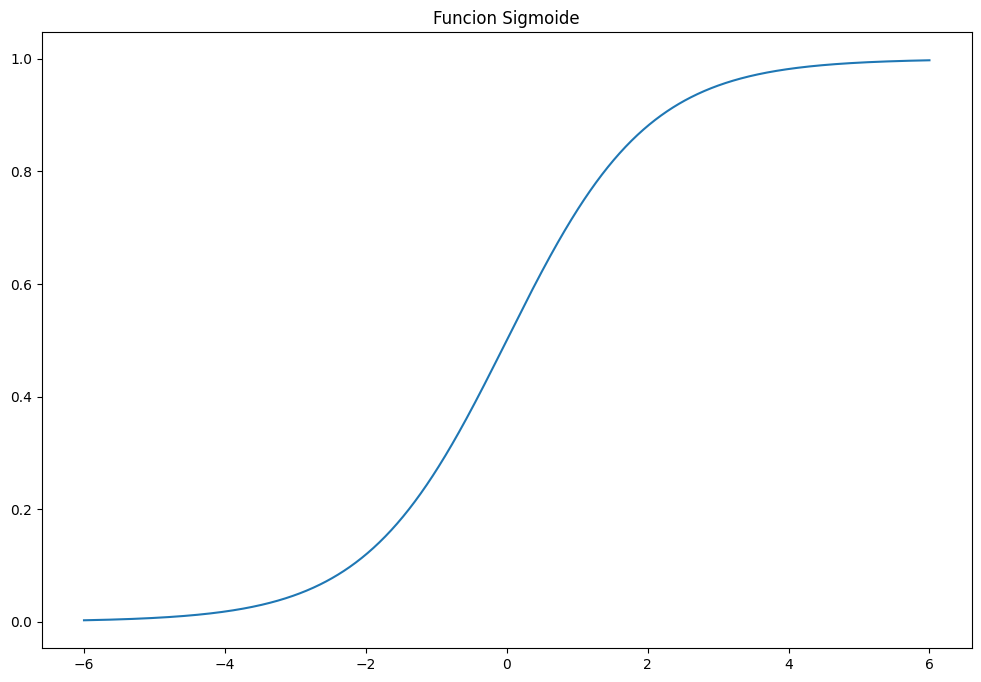

In [ ]:
# Cogemos del -6 al 6 y lo dividimos en 1000 pasos
x = np.linspace(-6, 6, num= 1000)
plt.figure(figsize=(12,8))
# Funcion sigmoide basade en la funcion de arriba
plt.plot(x, 1 / (1 + np.exp(-x)))
plt.title('Funcion Sigmoide')

# Aprendiendo el Modelo de Regresión Logística

Los coeficientes (valores Beta **b**) del algoritmo de regresión logística deben estimarse a partir de tus datos de entrenamiento.

- Generalmente se hace usando [estimación de máxima verosimilitud](#).
- La estimación de máxima verosimilitud es un algoritmo de aprendizaje común.
- Ten en cuenta los supuestos subyacentes sobre la distribución de tus datos.
- Los mejores coeficientes darían como resultado un modelo que prediga un valor muy cercano a 1 (por ejemplo, masculino) para la clase por defecto y un valor muy cercano a 0 (por ejemplo, femenino) para la otra clase.
- La intuición de la máxima verosimilitud para la regresión logística es que un procedimiento de búsqueda encuentra valores para los coeficientes (valores Beta) que minimicen el error en las probabilidades predichas por el modelo frente a las observadas en los datos.

---

# Aprendiendo con Descenso de Gradiente Estocástico

La regresión logística usa **descenso de gradiente** para actualizar los coeficientes.

En cada iteración del descenso de gradiente, los coeficientes se actualizan usando la ecuación:

$$
\beta = \beta + \text{learning rate} \times (y - \hat{y}) \times \hat{y} \times (1 - \hat{y}) \times x
$$


---
---
# Usando Scikit Learn para coeficientes estimados

In [12]:
from sklearn.linear_model import LogisticRegression
dataset = [[-2.0011, 0],
           [-1.4654, 0],
           [0.0965, 0],
           [1.3881, 0],
           [3.0641, 0],
           [7.6275, 1],
           [5.3324, 1],
           [6.9225, 1],
           [8.6754, 1],
           [7.6737, 1]]

dataset

[[-2.0011, 0],
 [-1.4654, 0],
 [0.0965, 0],
 [1.3881, 0],
 [3.0641, 0],
 [7.6275, 1],
 [5.3324, 1],
 [6.9225, 1],
 [8.6754, 1],
 [7.6737, 1]]

In [16]:
X = np.array(dataset)[:, 0:1] # La columna 0 se almacena en X
y = np.array(dataset)[:, 1] # Almacenamos la columna 1

X

array([[-2.0011],
       [-1.4654],
       [ 0.0965],
       [ 1.3881],
       [ 3.0641],
       [ 7.6275],
       [ 5.3324],
       [ 6.9225],
       [ 8.6754],
       [ 7.6737]])

In [15]:
y

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [20]:
# Se crea un modelo de Regresión Logística con regularización L2 (ridge),
# un parámetro de regularización inversa C=1.0 y una tolerancia de 0.0001
clf_LR = LogisticRegression(C = 1.0, penalty = 'l2', tol = 0.0001, solver = 'lbfgs')

clf_LR.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
clf_LR.predict(X)

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [19]:
clf_LR.predict_proba(X)

array([[0.998535  , 0.001465  ],
       [0.99740881, 0.00259119],
       [0.98644138, 0.01355862],
       [0.94831048, 0.05168952],
       [0.75431534, 0.24568466],
       [0.02307455, 0.97692545],
       [0.21455803, 0.78544197],
       [0.04771091, 0.95228909],
       [0.00766499, 0.99233501],
       [0.02198944, 0.97801056]])

El método **`predict_proba`** devuelve las **probabilidades de pertenencia a cada clase** para cada muestra de entrada.

- Cada **fila** representa una observación del conjunto de datos.
- Cada **columna** corresponde a una clase:
  - La primera columna indica la probabilidad de que la muestra pertenezca a la clase `0`.
  - La segunda columna indica la probabilidad de que la muestra pertenezca a la clase `1`.

Por ejemplo:
- Una fila como `[0.9985 , 0.0015]` significa que el modelo estima un **99.85% de probabilidad de clase 0** y solo un **0.15% de probabilidad de clase 1**.
- Una fila como `[0.022 , 0.978]` significa que el modelo estima un **2.2% de probabilidad de clase 0** y un **97.8% de probabilidad de clase 1**.

En resumen: **`predict_proba` no da la clase directamente, sino las probabilidades asociadas a cada clase.**


---
---
# Ejercicio de clasificacion

In [22]:
dataset2 = [[ 0.2,  0. ],
            [ 0.2,  0. ],
            [ 0.2,  0. ],
            [ 0.2,  0. ],
            [ 0.2,  0. ],
            [ 0.4,  0. ],
            [ 0.3,  0. ],
            [ 0.2,  0. ],
            [ 0.2,  0. ],
            [ 0.1,  0. ],
            [ 1.4,  1. ],
            [ 1.5,  1. ],
            [ 1.5,  1. ],
            [ 1.3,  1. ],
            [ 1.5,  1. ],
            [ 1.3,  1. ],
            [ 1.6,  1. ],
            [ 1. ,  1. ],
            [ 1.3,  1. ],
            [ 1.4,  1. ]]

X = np.array(dataset2)[:, 0:1] # La columna 0 se almacena en X
y = np.array(dataset2)[:, 1] # Almacenamos la columna 1

X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4]])

In [24]:
# Se crea un modelo de Regresión Logística con regularización L2 (ridge),
# un parámetro de regularización inversa C=1.0 y una tolerancia de 0.0001
clf_LR = LogisticRegression(C = 1.0, penalty = 'l2', tol = 0.0001, solver = 'lbfgs')

clf_LR.fit(X, y)

y_pred = clf_LR.predict(X)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [26]:
np.column_stack((y_pred, y))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [ ]:
# Le pasamos X con valor 0.4 a ver que predice
clf_LR.predict(np.array([0.4]).reshape(1,-1))

array([0.])

In [28]:
# Le pasamos X con valor 1.5 a ver que predice
clf_LR.predict(np.array([1.5]).reshape(1,-1))

array([1.])

In [29]:
# Quiero encontrar el punto donde y pasa de 0 a 1
clf_LR.predict(np.array([0.6]).reshape(1,-1))

array([0.])